**1. Loading the dataset**

In [ ]:
import pandas as pd

# GitHub raw URL
url = 'https://raw.githubusercontent.com/abuthahir17/CODSOFT_INTERNSHIP/main/IRIS.csv'

# Read CSV file
data = pd.read_csv(url)

print("Dataset loaded successfully.")


Dataset loaded successfully.


**2. Data Inspection**

2.1. First 5 Rows

In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


2.2. Dataset Information

In [ ]:
print("Information about the dataset:")
print(data.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


 2.3. Describing the Dataset

In [ ]:
print("Descriptive statistics of the dataset:")
print(data.describe())

Descriptive statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


2.4. Checking Dataset Shape

In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (150, 5)


2.5. Checking Missing Values

In [ ]:
print("Missing values in each column:")
print(data.isnull().sum())

# There is no missing value

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


2.6. Species Distribution


In [ ]:
print(data['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


**3. Data Visualization**

3.1. Class Distribution Plot (Count Plot)

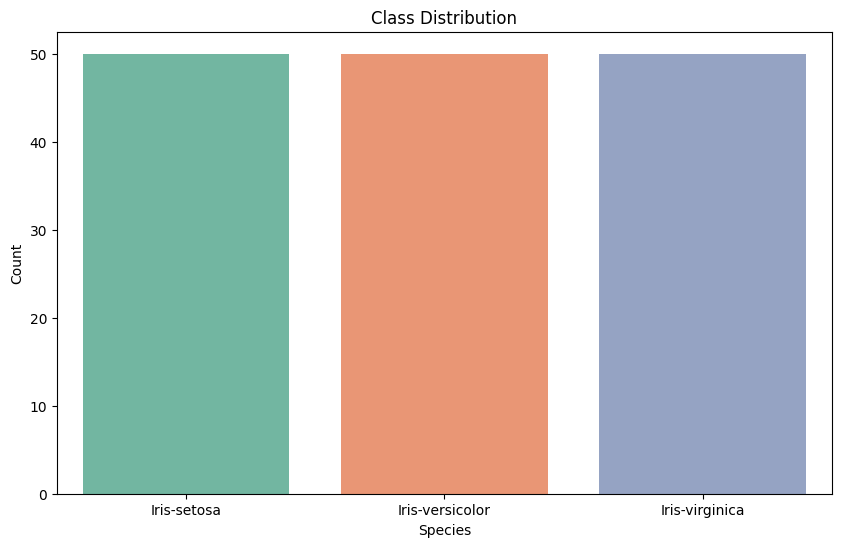

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='species' ,hue='species',  palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

3.2. Pairplot of Iris Features (Pairplot)

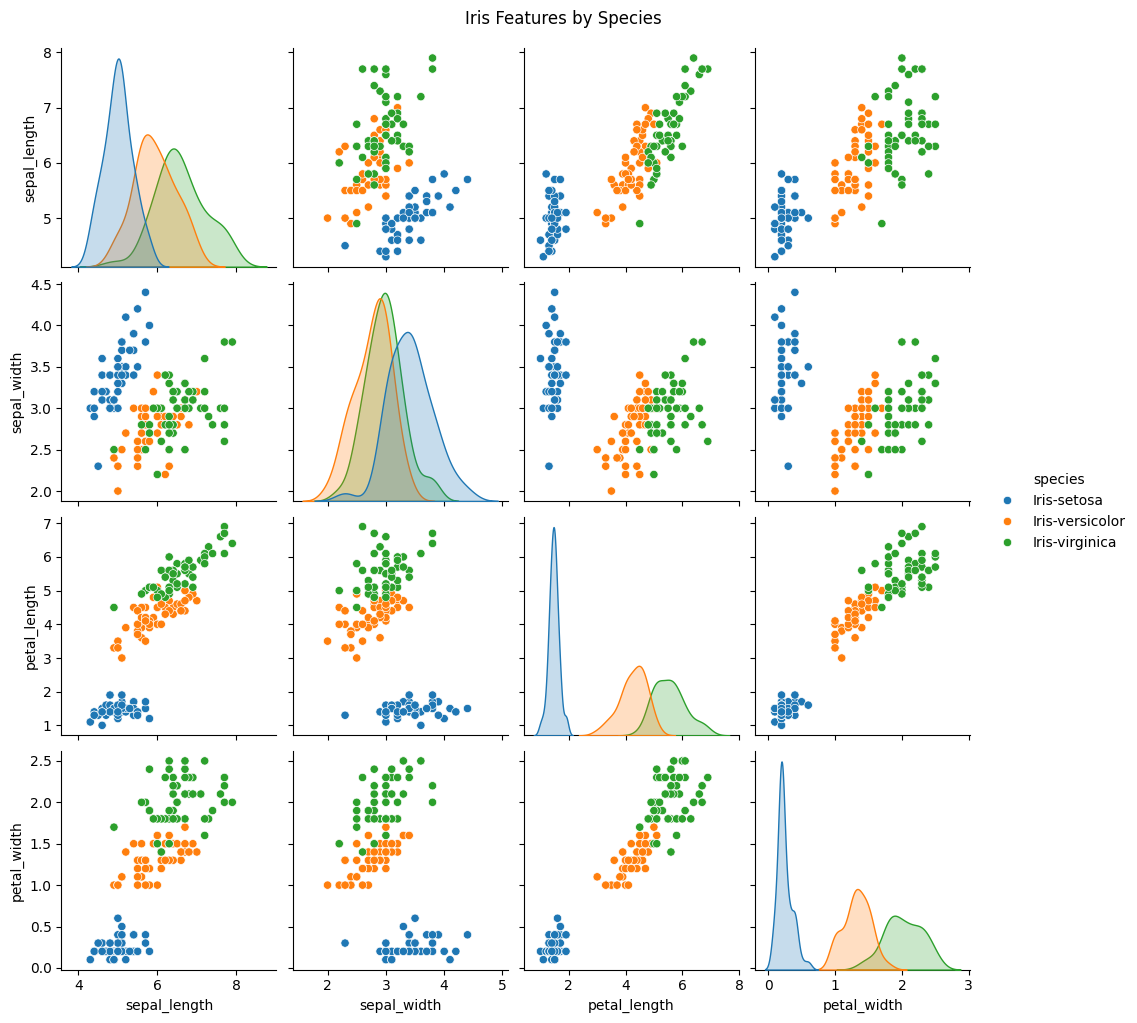

In [ ]:
sns.pairplot(data, hue="species")
plt.suptitle("Iris Features by Species", y=1.02)
plt.show()

3.3. Feature Correlation Heatmap

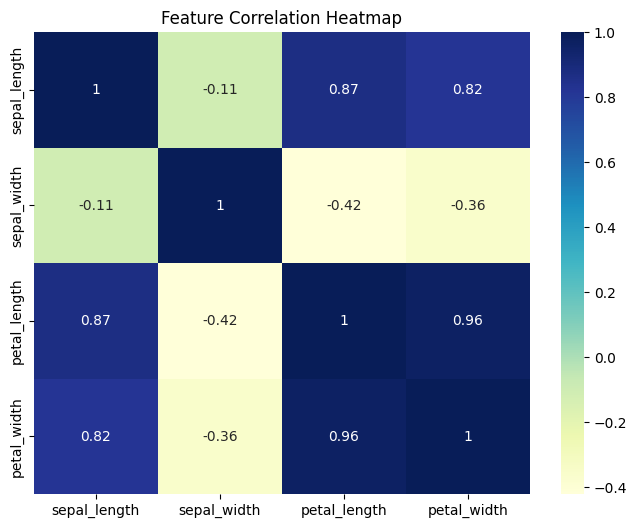

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.drop('species', axis=1).corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

**4. Data Preprocessing**

4.1. Label Encoding

In [ ]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species_encoded'] = le.fit_transform(data['species'])

4.2. Feature and Target Separation


In [ ]:
# Split the data
X = data.drop(['species', 'species_encoded'], axis=1)
y = data['species_encoded']

4.3. Data Splitting


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


**5. Model Training**

5.1. Initialize the models

In [ ]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


5.2. Feature Importance

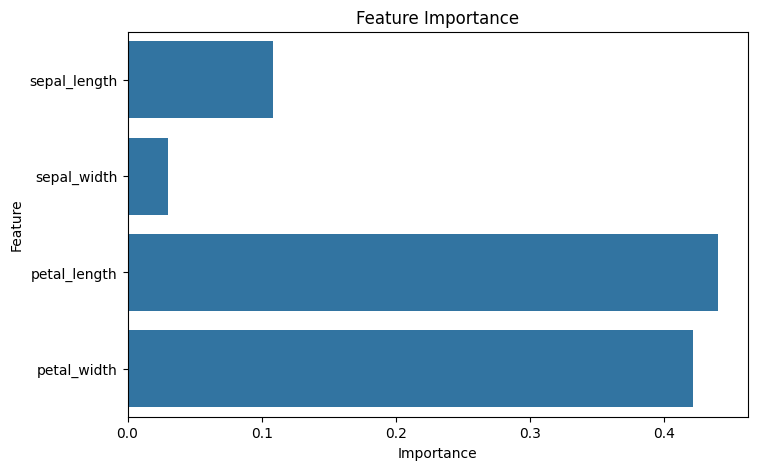

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

5.3. Model Prediction


In [ ]:
y_pred_log = log_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

**6. Model Evaluation and Saving**

6.1. Classification Reports

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
#  Calculate the accuracy of the model.
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log) * 100:.2f}%")

print("\n\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")

print("\n\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")

Logistic Regression Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%


SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%


Random Forest Classification Report:
                 precision    recall  f1-score   support

    Ir

6.2. Confusion Matrices


Confusion Matrix for Logistic Regression:



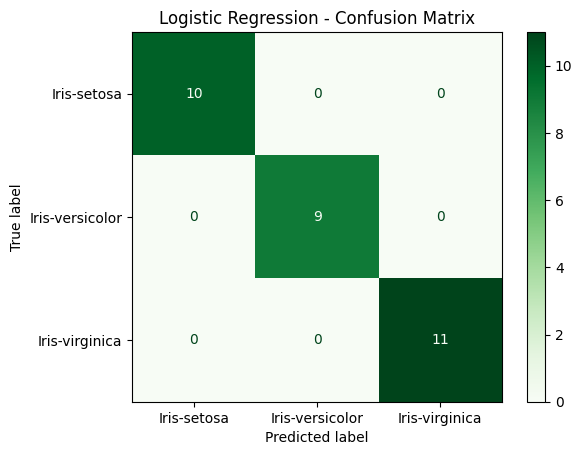


Confusion Matrix for Support Vector Machine:



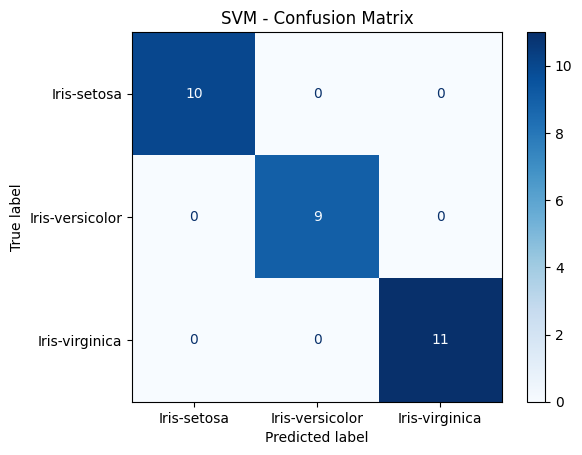


Confusion Matrix for Random Forest:



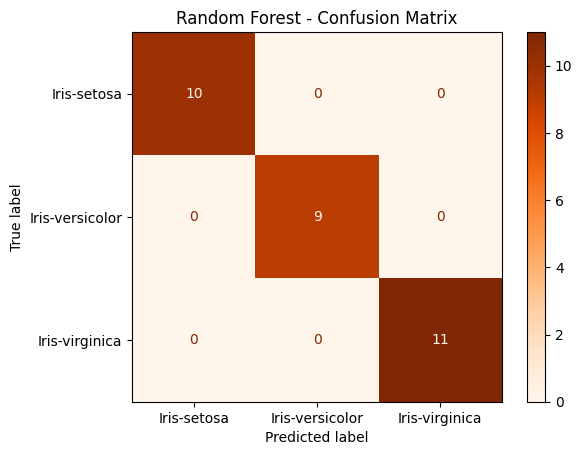

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

print("Confusion Matrix for Logistic Regression:\n")

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, display_labels=le.classes_, cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

print("\nConfusion Matrix for Support Vector Machine:\n")

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.show()

print("\nConfusion Matrix for Random Forest:\n")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=le.classes_, cmap='Oranges')
plt.title("Random Forest - Confusion Matrix")
plt.show()

6.3. Saving and Storing Models

In [ ]:
import joblib
joblib.dump(log_model, "iris_logistic_model.pkl")
joblib.dump(svm_model, "iris_svm_model.pkl")
joblib.dump(rf_model, "iris_random_forest_model.pkl")
print("Models saved: 'iris_logistic_model.pkl' , 'iris_svm_model.pkl' and 'iris_random_forest_model.pkl' ")

Models saved: 'iris_logistic_model.pkl' , 'iris_svm_model.pkl' and 'iris_random_forest_model.pkl' 


**7. Model Performance Analysis**

7.1. Performance Metrics Table

In [ ]:
#Performance Comparison Table
from sklearn.metrics import precision_recall_fscore_support

def get_metrics(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        "Model": model_name,
        "Accuracy": round(accuracy * 100, 2),
        "Precision": round(precision * 100, 2),
        "Recall": round(recall * 100, 2),
        "F1-Score": round(f1 * 100, 2)
    }

results = [
    get_metrics(y_test, y_pred_log, "Logistic Regression"),
    get_metrics(y_test, y_pred_svm, "SVM"),
    get_metrics(y_test, y_pred_rf, "Random Forest")
]

comparison_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:")
print(comparison_df)




📊 Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     100.0      100.0   100.0     100.0
1                  SVM     100.0      100.0   100.0     100.0
2        Random Forest     100.0      100.0   100.0     100.0


7.2 Performance Comparison Bar Chart

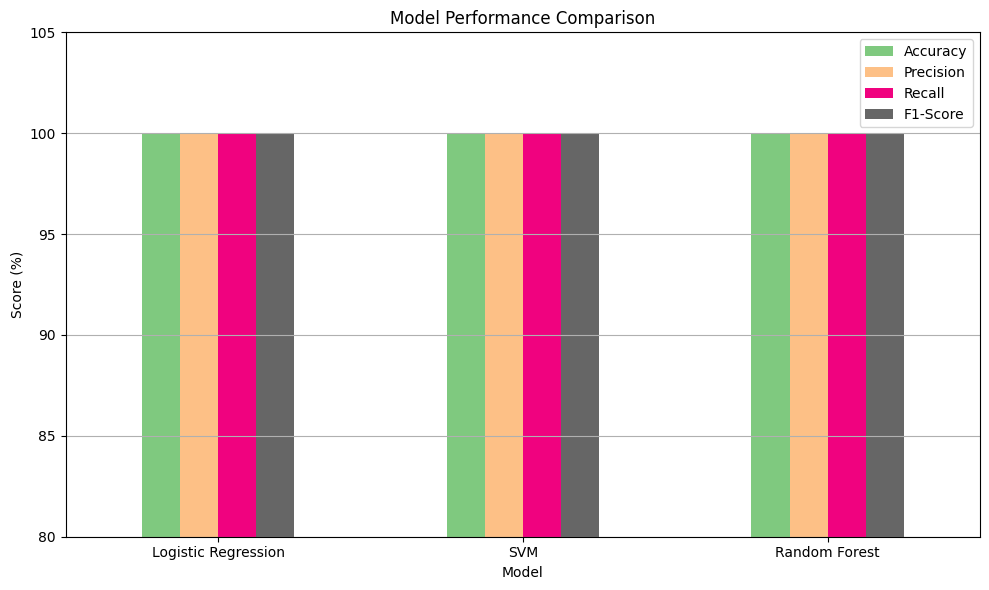

In [ ]:
comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(kind="bar", figsize=(10,6), colormap='Accent')
plt.title("Model Performance Comparison")
plt.ylabel("Score (%)")
plt.ylim(80, 105)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
print("--- Iris Flower Classification Task Complete ---")

--- Iris Flower Classification Task Complete ---
